In [1]:
from langgraph.graph import StateGraph,START, END
from typing import TypedDict,Literal,Annotated
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import SystemMessage, HumanMessage,BaseMessage

In [2]:
from langgraph.graph.message import add_messages
class Chat_system(TypedDict):
    messages:Annotated[list[BaseMessage],add_messages]

In [3]:
load_dotenv()
model=ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0.7,  
)

In [4]:
model.invoke("hello bro")

AIMessage(content='Hey there! How can I help you today?', additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019b7dde-f8d2-7f01-8ad1-048ce7823b1c-0', usage_metadata={'input_tokens': 3, 'output_tokens': 33, 'total_tokens': 36, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 23}})

In [5]:
def chat_node(state:Chat_system):
    messages=state['messages']
    response=model.invoke(messages)
    return {'messages':[response]}

In [6]:
from langgraph.checkpoint.memory import MemorySaver

In [7]:
checkpointer=MemorySaver()
graph=StateGraph(Chat_system)
graph.add_node('chat_node',chat_node)
graph.add_edge(START,'chat_node')
graph.add_edge('chat_node',END)

chat_bot=graph.compile(checkpointer=checkpointer)

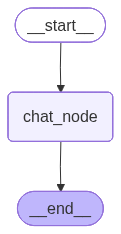

In [8]:
chat_bot

In [9]:
thread_id='1'
while True:
    user_message=input('Type :')
    if  user_message.strip().lower() in ['exit','quit','bye'] :
        break
    config={'configurable':{'thread_id':thread_id}}
    response=chat_bot.invoke({'messages':[HumanMessage(content=user_message)]},config=config)
    print(response['messages'][-1].content)
    
        